### We begin by introducing a simple regression problem

<p> Suppose we observe a real-valued input variable x and we wish to use this observation to predict the value of a real-valued target variable t. For the present purposes, it is instructive to consider an artificial example using synthetically generated data because we then know the precise process that generated the data for comparison against any
learned model</p>
<p>The data for this example is generated from the function sin(2πx) with random noise included in the target values. By generating data in this way, we are capturing a property of many real data sets, namely that they possess an underlying regularity, which we wish to learn, but that individual observations are corrupted by random noise.</p>
<p>Our goal is to exploit this training set in order to make predictions of the value of the target variable for some new value x of the input variable.</p>


In [56]:
import math
import random
import numpy as np
pie = (math.pi)
step = (np.arange(0, 100, 1))
y_values = np.arange(0, 10, 0.1)
x_values = []
for value in y_values:
    x_values.append(np.sin(value) + random.randrange(0,100)/100)
    # + (random.randint(0, 100)/10000)
print(len(x_values), len(y_values))

100 100


-0.9158146823277321 1.8979999767747389


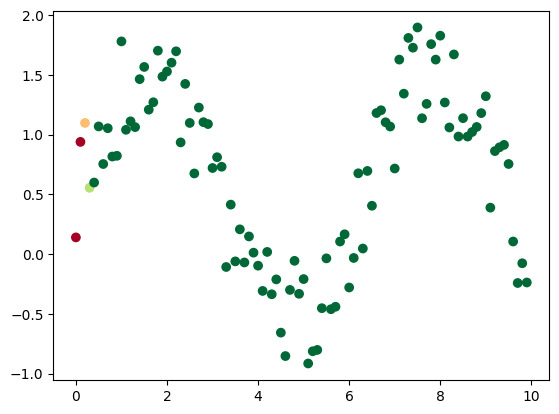

In [57]:
import matplotlib.pyplot as plt
y = np.arange(100)
names = np.arange(0, 100, 1)
# for i in range(11):
#     print(y_values[i],":",x_values[i])

print(min(x_values), max(x_values))
norm = plt.Normalize(1, 4)
cmap = plt.cm.RdYlGn

fig, ax = plt.subplots()
sc = plt.scatter(y_values, x_values, c=y,cmap=cmap, norm=norm)
annot = ax.annotate("", xy=(0, 0), xytext=(20, 20), textcoords="offset points",
                    bbox=dict(boxstyle="round", fc="w"),
                    arrowprops=dict(arrowstyle="->"))
annot.set_visible(False)


def update_annot(ind):
    pos = sc.get_offsets()[ind["ind"][0]]
    annot.xy = pos
    text = "({}, {})".format(" ".join(list(map(str, ind["ind"]))), " ".join(
        [names[n] for n in ind["ind"]]))
    annot.set_text(text)
    annot.get_bbox_patch().set_facecolor(cmap(norm(y[ind["ind"][0]])))
    annot.get_bbox_patch().set_alpha(0.4)


For the moment, however, we shall proceed rather informally and consider a simple approach based on curve fitting. In particular, we shall fit the data using a polynomial function of the form
$$ y(x,w) = {w_0 + w_1x + w_2x^2 + . . . w_Mx^M = \sum_{j=0}^M w_jx^j}$$  

where M is the order of the polynomial, and xj denotes x raised to the power of j. The polynomial coefficients w<sub>0</sub>, . . . , w<sub>M</sub> are collectively denoted by the vector w. Note that, although the polynomial function y(x, w) is a nonlinear function of x, it is a linear function of the coefficients w. Functions, such as the polynomial, which are linear in the unknown parameters have important properties and are called linear models.  

The values of the coefficients will be determined by fitting the polynomial to the training data. This can be done by minimizing an error function that measures the misfit between the function y(x, w), for any given value of w, and the training set data points. One simple choice of error function, which is widely used, is given by the sum of the squares of the errors between the predictions y(x<sub>n</sub>, w) for each data point x<sub>n</sub> and the corresponding target values t<sub>n</sub>, so that we minimize:  
$$ E(w) = {1/2\sum_{n=1}^N \{y(x_n,w) - t_n\}^2} $$  
where the factor of 1/2 is included for later convenience.  

We can solve the curve fitting problem by choosing the value of w for which E(w) is as small as possible. Because the error function is a quadratic function of the coefficients w, its derivatives with respect to the coefficients will be linear in the elements of w, and so the minimization of the error function has a unique solution, denoted by w<sup>*</sup>, which can be found in closed form. The resulting polynomial is given by the function y(x, w<sup>*</sup>). There remains the problem of choosing the order M of the polynomial, and as we shall see this will turn out to be an example of an important concept called <i>model comparison</i> or <i>model selection</i>.

In [58]:
step = np.arange(0, 100)
t_values = []
for val in step:
    t_values.append(x_values[val])


def error_function(N, y_xw, t_n):
    w = 0
    for i in range(N):
        w += (math.pow((y_xw[i] - t_n[i]), 2))
    w = 0.5 * w
    return w

In [59]:
# for M=0; y = k, where k is a constant, so the values of y_xw array should be np.full(N,k), where
# we can check for each value of k in a loop and get the minimal of the entire set


def get_minimal_error(N):
    W = []
    for i in np.arange(0,N,0.1):
        y_xw = np.full(N, i)
        W.append(error_function(N, y_xw, t_values))

    return W.index(min(W))
    # return W[:10]
print(get_minimal_error(100)/10)

0.7


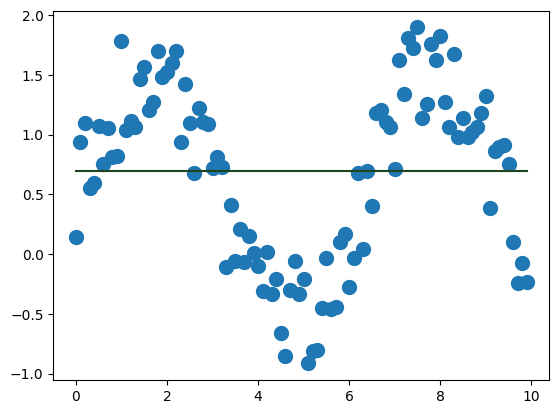

In [60]:
x_ticks = [i/10 for i in np.arange(0,100,5)]
fig = plt.figure()
ax = fig.add_subplot()
import matplotlib.ticker as ticker
ticks = ticker.FuncFormatter(lambda x, pos: '{0:g}'.format(x*0.1))
ax.xaxis.set_major_formatter(ticks)
plt.plot(np.arange(100),np.full(100,get_minimal_error(100)/10),1,color='#1e441e')

# for k in np.arange(0,get_minimal_error(100)):
    # plt.plot(np.arange(100),np.full(100,k),1)
plt.scatter(np.arange(0,100), x_values, s=100)
# plt.plot(np.arange(100),np.full(100,get_minimal_error(100)) , 1)